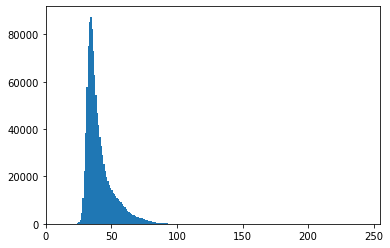

In [2]:
import matplotlib.pyplot as plt
import cv2

im = cv2.imread('/home/sara.pieri/Documents/datasets/Baby_SeaDrone/images/21.png')
# calculate mean value from RGB channels and flatten to 1D array
vals = im.mean(axis=2).flatten()
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.show()

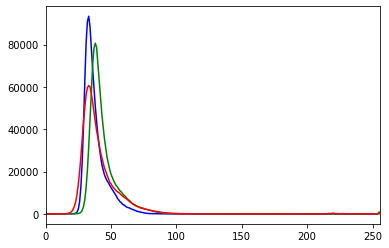

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/home/sara.pieri/Documents/datasets/Baby_SeaDrone/images/21.png')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

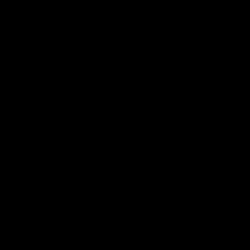

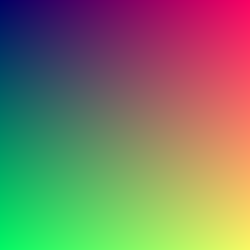

In [5]:
from PIL import Image
from IPython.display import display

MyImg = Image.new( 'RGB', (250,250), "black") 
pixels = MyImg.load() # creates the pixel map
display(MyImg)        # displays the black image
for i in range(MyImg.size[0]):    
    for j in range(MyImg.size[1]):  
        pixels[i,j] = (i, j, 100)

display(MyImg)        # displays the changed colourful image

In [1]:
import cv2
import numpy as np
from scipy.spatial.distance import cdist

# Load image, save shape, reshape as tall column of 3 RGB values
im  = cv2.imread('/home/sara.pieri/Documents/datasets/Baby_SeaDrone/images/21.png', cv2.IMREAD_COLOR)
origShape = im.shape
im  = im.reshape(-1,3)

# Work out distance to pure Blue for each pixel
blue = np.full((1,3), [255, 0 , 0])
d    = cdist(im, blue, metric='euclidean')   # THIS LINE DOES ALL THE WORK

indexNearest     = np.argmin(d) # get index of pixel nearest to blue
im[np.argmin(d)] = [0,0,255]    # make it red
d[indexNearest]  = 99999        # make it appear further so we don't find it again

indexNearest     = np.argmin(d) # get index of pixel second nearest to blue
im[np.argmin(d)] = [0,0,255]    # make it red

# Reshape back to original shape and save result
im = im.reshape(origShape)
cv2.imwrite('result.png',im)
#cv2.imshow("res",im)

True

In [5]:
# import the necessary packages
%matplotlib inline
import numpy as np
import scipy.spatial as sp
import matplotlib.pyplot as plt
import cv2

def main_colors(image_path) :
  #Stored all RGB values of main colors in a array
  main_colors = [   (0,0,0), #black
                    (255,255,255), #white
                    (255,0,0), #red
                    (0,255,0),#green
                    (0,0,255),#blue
                    (255,255,0), #yellow
                    (0,255,255), #cyan
                    (255,0,255), #magenta
                    ] 

  image = cv2.imread(image_path)
  #convert BGR to RGB image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  h,w,bpp = np.shape(image)

  #Change colors of each pixel
  #reference :https://stackoverflow.com/a/48884514/9799700
  for py in range(0,h):
      for px in range(0,w):
        ########################
        #Used this part to find nearest color 
        #reference : https://stackoverflow.com/a/22478139/9799700
        input_color = (image[py][px][0],image[py][px][1],image[py][px][2])
        tree = sp.KDTree(main_colors) 
        ditsance, result = tree.query(input_color) 
        nearest_color = main_colors[result]
        ###################
        
        image[py][px][0]=nearest_color[0]
        image[py][px][1]=nearest_color[1]
        image[py][px][2]=nearest_color[2]

  # show image
  plt.figure()
  plt.axis("off")
  plt.imshow(image)
  return image

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0, 255,   0],
        [255, 255,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

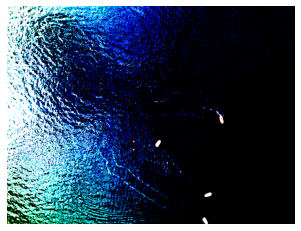

In [6]:
main_colors('/home/sara.pieri/Documents/datasets/SeaDroneSee/train/images/202.png')